## Environment preparation

In [301]:
# Import necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.cluster import AffinityPropagation
import distance
import nltk.corpus

from nltk.corpus import stopwords

# Change setting to any value to print any columns/rows of the DataFrame.
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", 15)

# To ignore scientific notation.
pd.set_option('display.float_format', lambda x: '%.2f' % x)

import warnings
warnings.filterwarnings('ignore')

## Load the data set

In [2]:
# Import and read the csv files into dataframes.
bike_sites = pd.read_csv("Biking sites.csv")
central_london = pd.read_csv("Central London.csv")
inner_london = pd.read_csv("Inner London.csv")
outer_london = pd.read_csv("Outer London.csv")

## 1. Sense-check and clean the data sets - bike_sites

### Sense-check the data set

In [3]:
# Explore the data set.
print(bike_sites.shape)
print(bike_sites.dtypes)

(2023, 8)
UnqID                      object
ProgID                     object
SurveyDescription          object
Easting                     int64
Northing                    int64
Location                   object
Borough                    object
Functional cycling area    object
dtype: object


In [4]:
# Print the data set.
bike_sites

,UnqID,ProgID,SurveyDescription,Easting,Northing,Location,Borough,Functional cycling area
0,CENCY001,CENCY,Central area cycle surveys,530251,178742,Millbank (south of Thorney Street),Westminster,Central
1,CENCY002,CENCY,Central area cycle surveys,533363,181824,Bishopsgate,City of London,Central
2,CENCY003,CENCY,Central area cycle surveys,532334,180520,Southwark Bridge,Southwark,Central
3,CENCY004,CENCY,Central area cycle surveys,532053,179678,Southwark Bridge Road,Southwark,Central
4,CENCY005,CENCY,Central area cycle surveys,533032,180213,Tooley Street,Southwark,Central
...,...,...,...,...,...,...,...,...
2018,QWPCY284,QWPCY,Quietway cycle surveys,516507,188467,Elmwood Avenue,Harrow,Outer
2019,QWPCY285,QWPCY,Quietway cycle surveys,515655,189672,Peel Road,Harrow,Outer
2020,QWPCY286,QWPCY,Quietway cycle surveys,515007,190213,Whitefriars Avenue,Harrow,Outer
2021,QWPCY287,QWPCY,Quietway cycle surveys,535456,186284,Chatsworth Road,Hackney,Inner


### Determine missing values

In [5]:
# Print total of missing values in the data set.
print(bike_sites.isnull().sum())

UnqID                      0
ProgID                     0
SurveyDescription          0
Easting                    0
Northing                   0
Location                   0
Borough                    0
Functional cycling area    2
dtype: int64


In [6]:
# Fill missing values with 0.
bike_sites.fillna(0, inplace = True)

In [7]:
# Check again for missing values.
print(bike_sites.isnull().sum())

UnqID                      0
ProgID                     0
SurveyDescription          0
Easting                    0
Northing                   0
Location                   0
Borough                    0
Functional cycling area    0
dtype: int64


## 1. Sense-check and clean the data sets - central_london

### Sense-check the data set

In [8]:
# Explore the data set.
print(central_london.shape)
print(central_london.dtypes)
print(central_london.columns)

(1048366, 17)
Survey wave (calendar quarter)     object
Equivalent financial quarter       object
Site ID                            object
Location                           object
Survey date                        object
                                   ...   
Number of cycle hire bikes        float64
Total cycles                      float64
Unnamed: 14                       float64
Unnamed: 15                       float64
Unnamed: 16                       float64
Length: 17, dtype: object
Index(['Survey wave (calendar quarter)', 'Equivalent financial quarter',
       'Site ID', 'Location', 'Survey date', 'Weather', 'Time', 'Period',
       'Direction', 'Start hour', 'Start minute', 'Number of private cycles',
       'Number of cycle hire bikes', 'Total cycles', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')


In [9]:
# Print the data set.
central_london

,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey date,...,Number of cycle hire bikes,Total cycles,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",...,0.0,0.0,NaN,NaN,NaN
1,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",...,0.0,15.0,NaN,NaN,NaN
2,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",...,0.0,35.0,NaN,NaN,NaN
3,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",...,2.0,61.0,NaN,NaN,NaN
4,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",...,0.0,73.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1048361,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
1048362,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
1048363,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
1048364,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN


### Remove 'unnamed' columns

In [10]:
# Remove 'unnamed' columns from the data set.
c_london = central_london.drop(['Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'], axis = 1)

In [11]:
# Check the new data frame.
print(c_london.shape)
print(c_london.dtypes)
print(c_london.columns)

(1048366, 14)
Survey wave (calendar quarter)     object
Equivalent financial quarter       object
Site ID                            object
Location                           object
Survey date                        object
Weather                            object
Time                               object
Period                             object
Direction                          object
Start hour                        float64
Start minute                      float64
Number of private cycles          float64
Number of cycle hire bikes        float64
Total cycles                      float64
dtype: object
Index(['Survey wave (calendar quarter)', 'Equivalent financial quarter',
       'Site ID', 'Location', 'Survey date', 'Weather', 'Time', 'Period',
       'Direction', 'Start hour', 'Start minute', 'Number of private cycles',
       'Number of cycle hire bikes', 'Total cycles'],
      dtype='object')


### Determine missing values

In [12]:
# Determine missing values.
print(c_london.isnull().sum())

Survey wave (calendar quarter)    290203
Equivalent financial quarter      290203
Site ID                           290203
Location                          290203
Survey date                       300359
Weather                           302037
Time                              290203
Period                            290203
Direction                         290203
Start hour                        290203
Start minute                      290203
Number of private cycles          290267
Number of cycle hire bikes        290267
Total cycles                      290203
dtype: int64


In [13]:
# Remove NaN values from data set.
c_london = c_london.dropna()

In [14]:
# Check the new data frame.
print(c_london.isnull().sum())
print(c_london.shape)
c_london

Survey wave (calendar quarter)    0
Equivalent financial quarter      0
Site ID                           0
Location                          0
Survey date                       0
Weather                           0
Time                              0
Period                            0
Direction                         0
Start hour                        0
Start minute                      0
Number of private cycles          0
Number of cycle hire bikes        0
Total cycles                      0
dtype: int64
(743317, 14)


,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey date,...,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles
0,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",...,6.0,0.0,0.0,0.0,0.0
1,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",...,6.0,15.0,15.0,0.0,15.0
2,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",...,6.0,30.0,35.0,0.0,35.0
3,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",...,6.0,45.0,59.0,2.0,61.0
4,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",...,7.0,0.0,73.0,0.0,73.0
...,...,...,...,...,...,...,...,...,...,...,...
758158,2021 Q4 (October-December),2021-22 Q3,CENCY702,Haymarket,"mar, 21/12/21",...,20.0,45.0,22.0,1.0,23.0
758159,2021 Q4 (October-December),2021-22 Q3,CENCY702,Haymarket,"mar, 21/12/21",...,21.0,0.0,20.0,0.0,20.0
758160,2021 Q4 (October-December),2021-22 Q3,CENCY702,Haymarket,"mar, 21/12/21",...,21.0,15.0,16.0,1.0,17.0
758161,2021 Q4 (October-December),2021-22 Q3,CENCY702,Haymarket,"mar, 21/12/21",...,21.0,30.0,10.0,1.0,11.0


## 1. Sense-check the data sets - inner_london

### Sense-check the data set

In [15]:
# Explore the data set.
print(inner_london.shape)
print(inner_london.dtypes)
print(inner_london.columns)

(615168, 13)
Survey wave (year)            float64
Site ID                        object
Location                       object
Survey date                    object
Weather                        object
Time                           object
Period                         object
Direction                      object
Start hour                    float64
Start minute                  float64
Number of private cycles      float64
Number of cycle hire bikes    float64
Total cycles                  float64
dtype: object
Index(['Survey wave (year)', 'Site ID', 'Location', 'Survey date', 'Weather',
       'Time', 'Period', 'Direction', 'Start hour', 'Start minute',
       'Number of private cycles', 'Number of cycle hire bikes',
       'Total cycles'],
      dtype='object')


In [16]:
# Print the data set.
inner_london

,Survey wave (year),Site ID,Location,Survey date,Weather,...,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles
0,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,...,6.0,0.0,1.0,0.0,1.0
1,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,...,6.0,15.0,2.0,0.0,2.0
2,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,...,6.0,30.0,2.0,0.0,2.0
3,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,...,6.0,45.0,4.0,0.0,4.0
4,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,...,7.0,0.0,4.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
615163,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
615164,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
615165,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
615166,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN


### Determine missing values

In [17]:
# Determine missing values.
print(inner_london.isnull().sum())

Survey wave (year)            91392
Site ID                       91392
Location                      91392
Survey date                   94144
Weather                       96066
Time                          91398
Period                        91398
Direction                     91392
Start hour                    91398
Start minute                  91398
Number of private cycles      91392
Number of cycle hire bikes    91392
Total cycles                  91392
dtype: int64


In [18]:
# Remove NaN values from data set.
i_london = inner_london.dropna()

In [19]:
# Check the new data frame.
print(i_london.isnull().sum())
print(i_london.shape)
i_london

Survey wave (year)            0
Site ID                       0
Location                      0
Survey date                   0
Weather                       0
Time                          0
Period                        0
Direction                     0
Start hour                    0
Start minute                  0
Number of private cycles      0
Number of cycle hire bikes    0
Total cycles                  0
dtype: int64
(516536, 13)


,Survey wave (year),Site ID,Location,Survey date,Weather,...,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles
0,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,...,6.0,0.0,1.0,0.0,1.0
1,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,...,6.0,15.0,2.0,0.0,2.0
2,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,...,6.0,30.0,2.0,0.0,2.0
3,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,...,6.0,45.0,4.0,0.0,4.0
4,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,...,7.0,0.0,4.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
523771,2021.0,INNCY597,Augustus Road,"mer, 26/05/21",Dry,...,20.0,45.0,3.0,0.0,3.0
523772,2021.0,INNCY597,Augustus Road,"mer, 26/05/21",Dry,...,21.0,0.0,2.0,0.0,2.0
523773,2021.0,INNCY597,Augustus Road,"mer, 26/05/21",Dry,...,21.0,15.0,2.0,0.0,2.0
523774,2021.0,INNCY597,Augustus Road,"mer, 26/05/21",Dry,...,21.0,30.0,2.0,0.0,2.0


## Sense-check the data sets - outer_london

### Sense-check the data set

In [20]:
# Explore the data set.
print(outer_london.shape)
print(outer_london.dtypes)
print(outer_london.columns)

(375660, 14)
Survey wave (year)           int64
Site ID                     object
Location                    object
Survey date                 object
Weather                     object
Time                        object
Period                      object
Direction                   object
Start hour                   int64
Start minute                 int64
Number of male cycles        int64
Number of female cycles      int64
Number of unknown cycles     int64
Total cycles                 int64
dtype: object
Index(['Survey wave (year)', 'Site ID', 'Location', 'Survey date', 'Weather',
       'Time', 'Period', 'Direction', 'Start hour', 'Start minute',
       'Number of male cycles', 'Number of female cycles',
       'Number of unknown cycles', 'Total cycles'],
      dtype='object')


In [21]:
# Print the data set.
outer_london

,Survey wave (year),Site ID,Location,Survey date,Weather,...,Start minute,Number of male cycles,Number of female cycles,Number of unknown cycles,Total cycles
0,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,...,0,2,1,0,3
1,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,...,15,3,0,0,3
2,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,...,30,2,0,0,2
3,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,...,45,4,0,0,4
4,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,...,0,4,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...
375655,2021,OUTCY451,Thames Path (Lower Ham Road),"ven, 18/06/21",Wet,...,45,1,0,0,1
375656,2021,OUTCY451,Thames Path (Lower Ham Road),"ven, 18/06/21",Wet,...,0,2,0,0,2
375657,2021,OUTCY451,Thames Path (Lower Ham Road),"ven, 18/06/21",Wet,...,15,0,0,0,0
375658,2021,OUTCY451,Thames Path (Lower Ham Road),"ven, 18/06/21",Wet,...,30,0,0,0,0


### Determine missing values

In [22]:
# Determine missing values.
print(outer_london.isnull().sum())

Survey wave (year)             0
Site ID                        0
Location                       0
Survey date                 1168
Weather                      968
Time                           0
Period                         0
Direction                      0
Start hour                     0
Start minute                   0
Number of male cycles          0
Number of female cycles        0
Number of unknown cycles       0
Total cycles                   0
dtype: int64


In [23]:
# Remove NaN values from data set (as the missing values are in date(time) and weather(object), it is best to remove them).
o_london = outer_london.dropna()

In [24]:
# Check the new data frame.
print(o_london.isnull().sum())
print(o_london.shape)
o_london

Survey wave (year)          0
Site ID                     0
Location                    0
Survey date                 0
Weather                     0
Time                        0
Period                      0
Direction                   0
Start hour                  0
Start minute                0
Number of male cycles       0
Number of female cycles     0
Number of unknown cycles    0
Total cycles                0
dtype: int64
(374180, 14)


,Survey wave (year),Site ID,Location,Survey date,Weather,...,Start minute,Number of male cycles,Number of female cycles,Number of unknown cycles,Total cycles
0,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,...,0,2,1,0,3
1,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,...,15,3,0,0,3
2,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,...,30,2,0,0,2
3,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,...,45,4,0,0,4
4,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,...,0,4,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...
375655,2021,OUTCY451,Thames Path (Lower Ham Road),"ven, 18/06/21",Wet,...,45,1,0,0,1
375656,2021,OUTCY451,Thames Path (Lower Ham Road),"ven, 18/06/21",Wet,...,0,2,0,0,2
375657,2021,OUTCY451,Thames Path (Lower Ham Road),"ven, 18/06/21",Wet,...,15,0,0,0,0
375658,2021,OUTCY451,Thames Path (Lower Ham Road),"ven, 18/06/21",Wet,...,30,0,0,0,0


## 2. Exploratory data analysis

### Central london: create subset to find out relationship between number of cycles to weather, time of travel (date/time) and direction

In [29]:
# Bring up the central london data set.
c_london.head()

,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles
0,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,0.0,0.0,0.0
1,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,15.0,0.0,15.0
2,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,35.0,0.0,35.0
3,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,59.0,2.0,61.0
4,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,73.0,0.0,73.0


In [143]:
# Create subset of data set with only relevant variables.
subset_c_london = c_london[['Survey wave (calendar quarter)', 'Location', 
                            'Survey date', 'Weather', 'Time', 
                            'Period', 'Direction', 'Total cycles']]

# View new data set.
print(subset_c_london.shape)
subset_c_london.head()

(743317, 8)


,Survey wave (calendar quarter),Location,Survey date,Weather,Time,Period,Direction,Total cycles
0,2014 Q1 (January-March),Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,0.00
1,2014 Q1 (January-March),Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,15.00
2,2014 Q1 (January-March),Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,35.00
3,2014 Q1 (January-March),Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,61.00
4,2014 Q1 (January-March),Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,73.00


In [144]:
# Clean up 'Survery date' column.
subset_c_london['Survey date'] = subset_c_london['Survey date'].str.split( \
',', n = 1, expand = True)[1]

# Check the data set.
subset_c_london.head()

,Survey wave (calendar quarter),Location,Survey date,Weather,Time,Period,Direction,Total cycles
0,2014 Q1 (January-March),Millbank (south of Thorney Street),24/01/14,Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,0.00
1,2014 Q1 (January-March),Millbank (south of Thorney Street),24/01/14,Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,15.00
2,2014 Q1 (January-March),Millbank (south of Thorney Street),24/01/14,Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,35.00
3,2014 Q1 (January-March),Millbank (south of Thorney Street),24/01/14,Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,61.00
4,2014 Q1 (January-March),Millbank (south of Thorney Street),24/01/14,Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,73.00


In [145]:
# Convert 'Survery data' column to datetime format.
subset_c_london['Survey date'] = pd.to_datetime(subset_c_london['Survey date'])

# Check the data set.
print(subset_c_london.info())
subset_c_london.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 743317 entries, 0 to 758162
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Survey wave (calendar quarter)  743317 non-null  object        
 1   Location                        743317 non-null  object        
 2   Survey date                     743061 non-null  datetime64[ns]
 3   Weather                         743317 non-null  object        
 4   Time                            743317 non-null  object        
 5   Period                          743317 non-null  object        
 6   Direction                       743317 non-null  object        
 7   Total cycles                    743317 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 51.0+ MB
None


,Survey wave (calendar quarter),Location,Survey date,Weather,Time,Period,Direction,Total cycles
0,2014 Q1 (January-March),Millbank (south of Thorney Street),2014-01-24,Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,0.00
1,2014 Q1 (January-March),Millbank (south of Thorney Street),2014-01-24,Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,15.00
2,2014 Q1 (January-March),Millbank (south of Thorney Street),2014-01-24,Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,35.00
3,2014 Q1 (January-March),Millbank (south of Thorney Street),2014-01-24,Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,61.00
4,2014 Q1 (January-March),Millbank (south of Thorney Street),2014-01-24,Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,73.00


In [270]:
# Remove null values from 'Survey date' column.
print(subset_c_london.isnull().sum())
subset_c_london = subset_c_london.dropna()

Survey Year/Quarter    0
Location               0
Survey date            0
Weather                0
Time                   0
Period                 0
Direction              0
Total cycles           0
dtype: int64


In [269]:
# Check again.
print(subset_c_london.isnull().sum())
print(subset_c_london.info())

Survey Year/Quarter    0
Location               0
Survey date            0
Weather                0
Time                   0
Period                 0
Direction              0
Total cycles           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 743061 entries, 0 to 758162
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Survey Year/Quarter  743061 non-null  object        
 1   Location             743061 non-null  object        
 2   Survey date          743061 non-null  datetime64[ns]
 3   Weather              743061 non-null  object        
 4   Time                 743061 non-null  object        
 5   Period               743061 non-null  object        
 6   Direction            743061 non-null  object        
 7   Total cycles         743061 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 51.0+ MB
None


In [271]:
# Rename 'Survey wave' column.
subset_c_london.rename(columns = {'Survey wave (calendar quarter)':'Survey Year/Quarter'},
                      inplace = True)

# Check the data set.
subset_c_london.head()

,Survey Year/Quarter,Location,Survey date,Weather,Time,Period,Direction,Total cycles
0,2014 Q1,Millbank (south of Thorney Street),2014-01-24,Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,0.00
1,2014 Q1,Millbank (south of Thorney Street),2014-01-24,Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,15.00
2,2014 Q1,Millbank (south of Thorney Street),2014-01-24,Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,35.00
3,2014 Q1,Millbank (south of Thorney Street),2014-01-24,Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,61.00
4,2014 Q1,Millbank (south of Thorney Street),2014-01-24,Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,73.00


In [152]:
# Split to re-organise 'Survey quarter' column.
subset_c_london['Survey Year/Quarter'] = subset_c_london['Survey Year/Quarter']\
.str.split('(', n = 1, expand = True)[0]

subset_c_london

,Survey Year/Quarter,Location,Survey date,Weather,Time,Period,Direction,Total cycles
0,2014 Q1,Millbank (south of Thorney Street),2014-01-24,Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,0.00
1,2014 Q1,Millbank (south of Thorney Street),2014-01-24,Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,15.00
2,2014 Q1,Millbank (south of Thorney Street),2014-01-24,Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,35.00
3,2014 Q1,Millbank (south of Thorney Street),2014-01-24,Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,61.00
4,2014 Q1,Millbank (south of Thorney Street),2014-01-24,Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,73.00
...,...,...,...,...,...,...,...,...
758158,2021 Q4,Haymarket,2021-12-21,Dry,2045 - 2100,Evening (19:00-22:00),Southbound,23.00
758159,2021 Q4,Haymarket,2021-12-21,Dry,2100 - 2115,Evening (19:00-22:00),Southbound,20.00
758160,2021 Q4,Haymarket,2021-12-21,Dry,2115 - 2130,Evening (19:00-22:00),Southbound,17.00
758161,2021 Q4,Haymarket,2021-12-21,Dry,2130 - 2145,Evening (19:00-22:00),Southbound,11.00


#### Re-categorise 'Weather' column

In [286]:
# Determine the unique values for 'Weather' column.
print(subset_c_london['Weather'].unique())

# Determine the number of counts for each value.
print(subset_c_london['Weather'].value_counts())

['Dry' 'Wet' 'Rain' 'Fine' 'Damp' 'Showery' 'Cold/rain' 'Light Rain'
 'Slightly Wet' 'Rain Stopped' 'Road Wet' 'Almost Dry' 'Light Shower'
 'Rain Damp' 'Rain Dry' 'Wet Damp' 'Very Wet' 'V Wet' 'Wet - Dry'
 'Dry - Wet' 'Dry - Rain' 'Damp - Rain' 'Wet/ Dry' 'S. Wet' 'V. Wet'
 'Wet Intermittently' 'Cloudy/ Rain' 'Windy/ Rain' 'Cold/ Rain' 'Drizzle'
 'Lt Rain' 'Dry & Sunny' 'Spitting' 'Showers' 'Cloudy' 'Sunny'
 'Light Showers' 'Hazy' 'Shower' 'Foggy' 'Dull' 'Wet/dry' 'Kdry'
 'Partly Cloudy' 'Rainy' 'Wet T' 'Sun' 'Fair' 'Slight Drizzle'
 'Very Heavy Rain' 'Mild' 'Wet + Windy' 'Blustery' 'Rain/wind'
 'Fine Windy' 'Dry Windy' 'Dry Wet Road' 'Deluge' 'Dry/wet' 'Dry & Wet'
 'V Light Rain' 'Dry A.m Wet P.m' 'Wet Road' 'Cold' 'Cloudy/rain'
 'Wet & Windy' 'Windy' 'Down Pour' 'Dry & Very Windy' 'Mist'
 'Cold Windy Dry' 'Drty' 'Dry (windy)' 'Wet (windy)' 'Fine (windy)'
 'Road Drying Sun Out' 'Dryish' 'Wetish' 'Light Shrs' 'Dry & Windy'
 'Some Showers' 'Rains' 'Dry/sunny' 'Dry/cloudy' 'Dry/hot' 'Sun

In [346]:
# Filter only values with counts above 1000 and apply to new data frame.
subset_c_london_updated = subset_c_london.groupby('Weather').filter(lambda x : len(x) > 1000)

# View new data frame.
print(subset_c_london_updated['Weather'].unique())

['Dry' 'Wet' 'Rain' 'Fine' 'Drizzle' 'Cloudy' 'Sunny']


#### Aggregating the data set

In [355]:
# Aggregate the data set with pivot table (Weather).
subset_c_london_updated.reset_index().pivot_table(index = 'Survey Year/Quarter', columns = 'Weather',
                                          values = 'Total cycles')

Weather,Cloudy,Drizzle,Dry,Fine,Rain,Sunny,Wet
Survey Year/Quarter,,,,,,,
2014 Q1,NaN,NaN,15.04,12.93,13.89,NaN,11.35
2014 Q2,3.04,16.59,17.77,12.59,4.50,6.53,17.57
2014 Q3,NaN,NaN,17.47,24.11,5.93,NaN,16.84
2014 Q4,4.71,9.30,14.15,15.13,13.68,NaN,13.70
2015 Q1,1.57,5.60,13.82,16.71,24.79,NaN,11.14
2015 Q2,0.94,27.88,17.52,27.73,10.32,11.08,11.74
2015 Q3,17.77,27.61,17.32,21.09,20.70,25.80,16.29
2015 Q4,2.98,5.16,16.20,13.63,7.59,NaN,11.02
2016 Q1,3.15,13.45,15.02,10.15,15.38,29.64,12.55


In [330]:
# Aggregate the data set with pivot table (Direction).
subset_c_london.reset_index().pivot_table(index = 'Survey Year/Quarter', columns = 'Direction',
                                          values = 'Total cycles')

Direction,Eastbound,Northbound,Southbound,Westbound
Survey Year/Quarter,,,,
2014 Q1,13.37,14.17,13.03,13.46
2014 Q2,16.75,17.37,16.63,17.55
2014 Q3,18.48,17.29,16.56,17.96
2014 Q4,14.05,14.54,13.40,14.54
2015 Q1,13.60,14.23,12.98,13.83
2015 Q2,18.01,17.33,16.34,17.89
2015 Q3,18.08,17.57,16.23,18.74
2015 Q4,14.98,15.76,14.91,15.11
2016 Q1,14.39,15.18,14.07,14.36


In [235]:
# Aggregate the data set with pivot table (Time).
subset_c_london.reset_index().pivot_table(index = 'Survey Year/Quarter', columns = 'Period',
                                          values = 'Total cycles')

Period,AM peak (07:00-10:00),Early Morning (06:00-07:00),Evening (19:00-22:00),Inter-peak (10:00-16:00),PM peak (16:00-19:00)
Survey Year/Quarter,,,,,
2014 Q1,26.40,5.10,9.65,6.00,22.31
2014 Q2,31.08,7.53,13.04,8.24,27.93
2014 Q3,30.68,6.85,13.45,8.52,29.97
2014 Q4,25.86,5.35,10.28,6.98,23.40
2015 Q1,25.31,5.18,10.07,6.31,23.10
...,...,...,...,...,...
2020 Q1,31.19,6.29,11.88,7.68,28.39
2020 Q3,21.26,8.06,12.38,10.45,25.02
2021 Q2,21.46,7.80,13.32,10.49,24.61


### Inner london: create subset to find out relationship between number of cycles to weather, time of travel (date/time) and direction

In [35]:
# Bring up the inner london data set.
i_london.head()

,Survey wave (year),Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles
0,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,1.0,0.0,1.0
1,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,2.0,0.0,2.0
2,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,2.0,0.0,2.0
3,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,4.0,0.0,4.0
4,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,4.0,0.0,4.0


In [183]:
# Create subset of data set with only relevant variables.
subset_i_london = i_london[['Location', 'Survey date', 'Weather', 'Time', 
                            'Period', 'Direction', 'Total cycles']]

# View new data set.
print(subset_i_london.shape)
subset_i_london.head()

(516536, 7)


,Location,Survey date,Weather,Time,Period,Direction,Total cycles
0,Grove Road,"mer, 20/05/15",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,1.00
1,Grove Road,"mer, 20/05/15",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,2.00
2,Grove Road,"mer, 20/05/15",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,2.00
3,Grove Road,"mer, 20/05/15",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,4.00
4,Grove Road,"mer, 20/05/15",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,4.00


In [184]:
# Clean up 'Survery date' column.
subset_i_london['Survey date'] = subset_i_london['Survey date'].str.split( \
',', n = 1, expand = True)[1]

# Check the data set.
print(subset_i_london.info())
subset_i_london.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 516536 entries, 0 to 523775
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Location      516536 non-null  object 
 1   Survey date   516536 non-null  object 
 2   Weather       516536 non-null  object 
 3   Time          516536 non-null  object 
 4   Period        516536 non-null  object 
 5   Direction     516536 non-null  object 
 6   Total cycles  516536 non-null  float64
dtypes: float64(1), object(6)
memory usage: 31.5+ MB
None


,Location,Survey date,Weather,Time,Period,Direction,Total cycles
0,Grove Road,20/05/15,Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,1.00
1,Grove Road,20/05/15,Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,2.00
2,Grove Road,20/05/15,Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,2.00
3,Grove Road,20/05/15,Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,4.00
4,Grove Road,20/05/15,Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,4.00


In [185]:
# Convert 'Survey date' and 'Survey date (Y/M)' columns to datetime format.
subset_i_london['Survey date'] = pd.to_datetime(subset_i_london['Survey date'])

# Check the data set.
print(subset_i_london.info())
subset_i_london.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 516536 entries, 0 to 523775
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Location      516536 non-null  object        
 1   Survey date   516536 non-null  datetime64[ns]
 2   Weather       516536 non-null  object        
 3   Time          516536 non-null  object        
 4   Period        516536 non-null  object        
 5   Direction     516536 non-null  object        
 6   Total cycles  516536 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 31.5+ MB
None


,Location,Survey date,Weather,Time,Period,Direction,Total cycles
0,Grove Road,2015-05-20,Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,1.00
1,Grove Road,2015-05-20,Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,2.00
2,Grove Road,2015-05-20,Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,2.00
3,Grove Road,2015-05-20,Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,4.00
4,Grove Road,2015-05-20,Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,4.00


In [218]:
# Add column 'Survey date (Y/M)' to the data set.
subset_i_london['Survey date (Y/M)'] = subset_i_london['Survey date'].dt.to_period('M')

# Check the data set.
print(subset_i_london.info())
subset_i_london.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 516536 entries, 0 to 523775
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Location           516536 non-null  object        
 1   Survey date        516536 non-null  datetime64[ns]
 2   Weather            516536 non-null  object        
 3   Time               516536 non-null  object        
 4   Period             516536 non-null  object        
 5   Direction          516536 non-null  object        
 6   Total cycles       516536 non-null  float64       
 7   Survey date (Y/M)  516536 non-null  period[M]     
dtypes: datetime64[ns](1), float64(1), object(5), period[M](1)
memory usage: 35.5+ MB
None


,Location,Survey date,Weather,Time,Period,Direction,Total cycles,Survey date (Y/M)
0,Grove Road,2015-05-20,Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,1.00,2015-05
1,Grove Road,2015-05-20,Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,2.00,2015-05
2,Grove Road,2015-05-20,Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,2.00,2015-05
3,Grove Road,2015-05-20,Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,4.00,2015-05
4,Grove Road,2015-05-20,Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,4.00,2015-05


In [220]:
# Change the dtype of the column to datetime instead from period.
subset_i_london['Survey date (Y/M)'] = subset_i_london['Survey date (Y/M)'].astype(str)
subset_i_london['Survey date (Y/M)'] = pd.to_datetime(subset_i_london['Survey date (Y/M)'])

# Check the data set.
print(subset_i_london.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 516536 entries, 0 to 523775
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Location           516536 non-null  object        
 1   Survey date        516536 non-null  datetime64[ns]
 2   Weather            516536 non-null  object        
 3   Time               516536 non-null  object        
 4   Period             516536 non-null  object        
 5   Direction          516536 non-null  object        
 6   Total cycles       516536 non-null  float64       
 7   Survey date (Y/M)  516536 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 35.5+ MB
None


#### Re-categorise 'Weather' column

In [287]:
# Determine the unique values for 'Weather' column.
subset_i_london['Weather'].unique()

# Determine the number of counts for each value.
subset_i_london['Weather'].value_counts()

Dry                              433476
Wet                               55918
Sunny                              8025
Cloudy                             5740
Rain                               2978
Fine                               1436
Dry/sunny                           880
Unknown                             640
D                                   608
Drizzle                             500
Clear and Warm                      432
Dry/wet                             346
Sunny/cloudy                        218
Overcast                            200
Sun/cloudy                          176
Sun                                 166
Fair                                160
Showers                             154
Dry/sun                             138
Damp                                132
Cloudy with Clear Intervals         128
Cloudy but dry                      128
N/a                                 128
Cloudy/dry                          116
Cloudy/sunny                        116


In [313]:
# Filter only values with counts above 1000 and apply to new data frame.
subset_i_london_updated = subset_i_london.groupby('Weather').filter(lambda x : len(x) > 1000)

# View new data frame.
subset_i_london_updated['Weather'].unique()

array(['Dry', 'Wet', 'Sunny', 'Cloudy', 'Rain', 'Fine'], dtype=object)

#### Aggregating the data set

In [314]:
# Aggregate the data set with pivot table (Weather).
subset_i_london_updated.reset_index().pivot_table(index = 'Survey date (Y/M)', columns = 'Weather',
                                          values = 'Total cycles')

Weather,Cloudy,Dry,Fine,Rain,Sunny,Wet
Survey date (Y/M),,,,,,
2015-01-01,NaN,5.50,NaN,7.80,7.57,4.53
2015-02-01,0.81,4.87,NaN,3.33,10.43,0.90
2015-03-01,NaN,5.51,5.67,NaN,1.47,2.53
2015-04-01,16.41,6.05,7.73,4.75,5.53,1.23
2015-05-01,2.44,6.40,2.87,1.97,0.46,4.24
2015-06-01,6.86,6.14,2.63,2.83,7.95,5.91
2015-07-01,1.58,5.09,NaN,1.81,0.68,4.83
2015-08-01,1.13,5.89,NaN,0.22,7.38,8.45
2015-09-01,NaN,6.55,NaN,NaN,NaN,NaN


In [232]:
# Aggregate the data set with pivot table (Direction).
subset_i_london.reset_index().pivot_table(index = 'Survey date (Y/M)', columns = 'Direction',
                                          values = 'Total cycles')

Direction,Eastbound,Northbound,Southbound,Westbound
Survey date (Y/M),,,,
2015-01-01,5.92,2.75,5.31,7.32
2015-02-01,5.78,6.17,3.09,4.15
2015-03-01,6.01,4.74,6.14,4.89
2015-04-01,5.47,6.45,6.59,5.71
2015-05-01,4.23,7.20,6.22,4.52
...,...,...,...,...
2021-08-01,4.63,7.11,7.28,6.13
2021-09-01,6.46,5.32,6.89,5.73
2021-10-01,9.72,7.55,7.35,6.75


In [234]:
# Aggregate the data set with pivot table (Time).
subset_i_london.reset_index().pivot_table(index = 'Survey date (Y/M)', columns = 'Period',
                                          values = 'Total cycles')

Period,AM peak (07:00-10:00),Early Morning (06:00-07:00),Evening (19:00-22:00),Inter-peak (10:00-16:00),PM peak (16:00-19:00)
Survey date (Y/M),,,,,
2015-01-01,10.24,3.03,4.58,2.96,7.78
2015-02-01,7.92,2.31,4.89,2.28,7.30
2015-03-01,8.90,2.72,6.38,2.87,10.27
2015-04-01,9.76,2.85,5.56,3.06,9.90
2015-05-01,11.13,3.45,5.07,2.74,8.18
...,...,...,...,...,...
2021-08-01,8.58,2.51,6.90,4.44,10.32
2021-09-01,6.79,2.17,5.56,6.06,8.50
2021-10-01,14.28,4.95,5.97,4.95,8.76


### Outer london: create subset to find out relationship between number of cycles to weather, time of travel (date/time) and direction

In [37]:
# Bring up the inner london data set.
o_london.head()

,Survey wave (year),Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of male cycles,Number of female cycles,Number of unknown cycles,Total cycles
0,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6,0,2,1,0,3
1,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6,15,3,0,0,3
2,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6,30,2,0,0,2
3,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6,45,4,0,0,4
4,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7,0,4,1,0,5


In [190]:
# Create subset of data set with only relevant variables.
subset_o_london = o_london[['Location', 'Survey date', 'Weather', 'Time', 
                            'Period', 'Direction', 'Number of male cycles',
                            'Number of female cycles', 'Total cycles']]

# View new data set.
print(subset_o_london.shape)
subset_o_london.head()

(374180, 9)


,Location,Survey date,Weather,Time,Period,Direction,Number of male cycles,Number of female cycles,Total cycles
0,High Road Leyton,"ven, 26/06/15",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,2,1,3
1,High Road Leyton,"ven, 26/06/15",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,3,0,3
2,High Road Leyton,"ven, 26/06/15",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,2,0,2
3,High Road Leyton,"ven, 26/06/15",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,4,0,4
4,High Road Leyton,"ven, 26/06/15",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,4,1,5


In [191]:
# Clean up 'Survery date' column.
subset_o_london['Survey date'] = subset_o_london['Survey date'].str.split( \
',', n = 1, expand = True)[1]

# Check the data set.
subset_o_london.head()

,Location,Survey date,Weather,Time,Period,Direction,Number of male cycles,Number of female cycles,Total cycles
0,High Road Leyton,26/06/15,Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,2,1,3
1,High Road Leyton,26/06/15,Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,3,0,3
2,High Road Leyton,26/06/15,Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,2,0,2
3,High Road Leyton,26/06/15,Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,4,0,4
4,High Road Leyton,26/06/15,Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,4,1,5


In [192]:
# Convert 'Survery data' column to datetime format.
subset_o_london['Survey date'] = pd.to_datetime(subset_o_london['Survey date'])

# Check the data set.
print(subset_o_london.info())
subset_o_london.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374180 entries, 0 to 375659
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Location                 374180 non-null  object        
 1   Survey date              374180 non-null  datetime64[ns]
 2   Weather                  374180 non-null  object        
 3   Time                     374180 non-null  object        
 4   Period                   374180 non-null  object        
 5   Direction                374180 non-null  object        
 6   Number of male cycles    374180 non-null  int64         
 7   Number of female cycles  374180 non-null  int64         
 8   Total cycles             374180 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 28.5+ MB
None


,Location,Survey date,Weather,Time,Period,Direction,Number of male cycles,Number of female cycles,Total cycles
0,High Road Leyton,2015-06-26,Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,2,1,3
1,High Road Leyton,2015-06-26,Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,3,0,3
2,High Road Leyton,2015-06-26,Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,2,0,2
3,High Road Leyton,2015-06-26,Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,4,0,4
4,High Road Leyton,2015-06-26,Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,4,1,5


In [193]:
# Add column 'Survey date (Y/M)' to the data set.
subset_o_london['Survey date (Y/M)'] = pd.to_datetime(subset_o_london['Survey date'])\
.dt.to_period('M')

# Check the data set.
print(subset_o_london.info())
subset_o_london.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374180 entries, 0 to 375659
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Location                 374180 non-null  object        
 1   Survey date              374180 non-null  datetime64[ns]
 2   Weather                  374180 non-null  object        
 3   Time                     374180 non-null  object        
 4   Period                   374180 non-null  object        
 5   Direction                374180 non-null  object        
 6   Number of male cycles    374180 non-null  int64         
 7   Number of female cycles  374180 non-null  int64         
 8   Total cycles             374180 non-null  int64         
 9   Survey date (Y/M)        374180 non-null  period[M]     
dtypes: datetime64[ns](1), int64(3), object(5), period[M](1)
memory usage: 31.4+ MB
None


,Location,Survey date,Weather,Time,Period,Direction,Number of male cycles,Number of female cycles,Total cycles,Survey date (Y/M)
0,High Road Leyton,2015-06-26,Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,2,1,3,2015-06
1,High Road Leyton,2015-06-26,Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,3,0,3,2015-06
2,High Road Leyton,2015-06-26,Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,2,0,2,2015-06
3,High Road Leyton,2015-06-26,Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,4,0,4,2015-06
4,High Road Leyton,2015-06-26,Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,4,1,5,2015-06


In [221]:
# Change the dtype of the column to datetime instead from period.
subset_o_london['Survey date (Y/M)'] = subset_o_london['Survey date (Y/M)'].astype(str)
subset_o_london['Survey date (Y/M)'] = pd.to_datetime(subset_o_london['Survey date (Y/M)'])

# Check the data set.
print(subset_o_london.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374180 entries, 0 to 375659
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Location                 374180 non-null  object        
 1   Survey date              374180 non-null  datetime64[ns]
 2   Weather                  374180 non-null  object        
 3   Time                     374180 non-null  object        
 4   Period                   374180 non-null  object        
 5   Direction                374180 non-null  object        
 6   Number of male cycles    374180 non-null  int64         
 7   Number of female cycles  374180 non-null  int64         
 8   Total cycles             374180 non-null  int64         
 9   Survey date (Y/M)        374180 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 31.4+ MB
None


#### Re-categorise 'Weather' column

In [288]:
# Determine the unique values for 'Weather' column.
subset_o_london['Weather'].unique()

# Determine the number of counts for each value.
subset_o_london['Weather'].value_counts()

Dry                                323869
Wet                                 41171
Fine                                 1504
Sunny                                1262
D                                     704
Rain                                  646
Cold                                  338
Dry & Sunny                           330
Good                                  256
Cloudy                                232
Clear and Bright                      180
Clear                                 170
Wet/dry                               140
Sunny Dry                             128
Unknown                               128
Dry/good                              128
Windy                                 120
Dry/sunny                             108
Light Rain                            100
Hot                                    96
Showers                                92
Drizzle                                90
Dry Hot!!                              86
Cloudy bright intervals           

In [315]:
# Filter only values with counts above 1000 and apply to new data frame.
subset_o_london_updated = subset_o_london.groupby('Weather').filter(lambda x : len(x) > 1000)

# View new data frame.
subset_o_london_updated['Weather'].unique()

array(['Dry', 'Wet', 'Sunny', 'Fine'], dtype=object)

#### Aggregating the data set

In [316]:
# Aggregate the data set with pivot table (Weather).
subset_o_london_updated.reset_index().pivot_table(index = 'Survey date (Y/M)', columns = 'Weather',
                                          values = ['Number of male cycles', 'Number of female cycles'])

Number of female cycles                  \
Weather                               Dry Fine Sunny  Wet   
Survey date (Y/M)                                           
2015-01-01                           0.09 0.21  0.13 0.04   
2015-02-01                           0.13  NaN   NaN 0.10   
2015-03-01                           0.22 0.50  0.14  NaN   
2015-04-01                           0.18 0.00  0.23 0.19   
2015-05-01                           0.19  NaN  0.18 0.10   
2015-06-01                           0.25  NaN  0.00 0.26   
2015-07-01                           0.10  NaN   NaN 0.34   
2015-08-01                           0.37  NaN  0.25 0.34   
2015-09-01                           0.46  NaN   NaN  NaN   
2015-10-01                           0.24 0.21   NaN  NaN   
2015-11-01                           0.11 0.08  0.37  NaN   
2015-12-01                           0.09  NaN   NaN 0.06   
2016-01-01                           0.04  NaN   NaN 0.00   
2016-03-01                           0.15  NaN   NaN  NaN   
2016-04-01                           0.17 0.07  0.00 0.14   
2016-05-01                           0.21 0.33   NaN 0.06   
2016-06-01                           0.20  NaN  0.00 0.12   
2016-07-01                           0.38  NaN   NaN 0.36   
2016-08-01                           0.38  NaN   NaN 0.51   
2016-09-01                           0.19  NaN   NaN 0.27   
2016-10-01                           0.11  NaN   NaN 0.10   
2016-11-01                           0.28 0.21   NaN 0.11   
2016-12-01                           0.18  NaN   NaN 0.26   
2017-02-01                           0.18 0.19  0.06 0.14   
2017-03-01                           0.21  NaN   NaN 0.08   
2017-04-01                           0.21  NaN   NaN 0.13   
2017-05-01                           0.29 0.10   NaN 0.09   
2017-06-01                           0.29  NaN   NaN 0.09   
2017-07-01                           0.30  NaN   NaN 1.03   
2017-08-01                           0.25 0.25   NaN  NaN   
2017-09-01                           0.20  NaN   NaN 0.02   
2017-10-01                           0.19  NaN   NaN  NaN   
2017-11-01                           0.12  NaN   NaN 0.11   
2017-12-01                           0.30  NaN   NaN 0.05   
2018-01-01                           0.96  NaN   NaN  NaN   
2018-02-01                           0.24  NaN   NaN 0.70   
2018-03-01                           0.28  NaN   NaN  NaN   
2018-04-01                           0.32  NaN   NaN 0.15   
2018-05-01                           0.23  NaN   NaN 0.06   
2018-06-01                           0.20  NaN   NaN 0.67   
2018-07-01                           0.20  NaN   NaN  NaN   
2018-08-01                           0.15  NaN   NaN  NaN   
2018-09-01                           0.40  NaN   NaN  NaN   
2018-10-01                           0.45  NaN   NaN  NaN   
2018-11-01                           0.29  NaN   NaN 0.00   
2018-12-01                           0.24  NaN   NaN 0.02   
2019-01-01                           0.18 0.08   NaN  NaN   
2019-02-01                           0.39  NaN  0.10  NaN   
2019-03-01                           0.29 0.83  0.17 0.75   
2019-04-01                           0.25 0.10  0.06 0.14   
2019-05-01                           0.21 0.29  0.05 0.06   
2019-06-01                           0.22  NaN   NaN 0.16   
2019-07-01                           0.18 0.16  0.11 0.20   
2019-08-01                           0.54 0.41   NaN 0.06   
2019-09-01                           0.34  NaN   NaN 0.12   
2019-10-01                           0.25  NaN   NaN 0.18   
2019-11-01                           0.35  NaN   NaN 0.06   
2019-12-01                           0.17  NaN   NaN 0.23   
2020-01-01                           0.19  NaN   NaN 0.23   
2020-02-01                           0.27  NaN   NaN 0.05   
2020-03-01                           0.03  NaN   NaN 0.00   
2020-04-01                           0.13  NaN   NaN  NaN   
2020-05-01                           0.20  NaN   NaN 

In [274]:
# Aggregate the data set with pivot table (Direction).
subset_o_london.reset_index().pivot_table(index = 'Survey date (Y/M)', columns = 'Direction',
                                          values = ['Number of male cycles', 'Number of female cycles'])

Number of female cycles                                  \
Direction                       Eastbound Northbound Southbound Westbound   
Survey date (Y/M)                                                           
2015-01-01                           0.10       0.10       0.10      0.12   
2015-02-01                           0.10       0.17       0.11      0.12   
2015-03-01                           0.13       0.22       0.25      0.18   
2015-04-01                           0.24       0.13       0.13      0.23   
2015-05-01                           0.21       0.14       0.16      0.20   
...                                   ...        ...        ...       ...   
2021-08-01                           0.16       0.26       0.22      0.26   
2021-09-01                           0.14       0.22       0.31      0.14   
2021-10-01                           0.48       0.19       0.25      0.62   
2021-11-01                           0.39       0.14       0.16      0.33   
2021-12-01                           0.44       0.35       0.32      0.46   

                  Number of male cycles                                  
Direction                     Eastbound Northbound Southbound Westbound  
Survey date (Y/M)                                                        
2015-01-01                         0.58       0.85       1.10      0.70  
2015-02-01                         0.80       1.37       0.90      0.82  
2015-03-01                         1.05       1.01       1.49      0.85  
2015-04-01                         1.43       1.22       1.16      1.43  
2015-05-01                         1.00       0.97       0.95      1.07  
...                                 ...        ...        ...       ...  
2021-08-01                         1.78       1.53       1.53      2.69  
2021-09-01                         1.39       1.62       2.02      1.04  
2021-10-01                         1.69       1.34       1.26      2.05  
2021-11-01                         1.64       1.55       1.27      1.34  
2021-12-01                         1.98       1.66       1.68      2.20  

[81 rows x 8 columns]

In [275]:
# Aggregate the data set with pivot table (Time).
subset_o_london.reset_index().pivot_table(index = 'Survey date (Y/M)', columns = 'Period',
                                          values = ['Number of male cycles', 'Number of female cycles'])

Number of female cycles                              \
Period              AM peak (07:00-10:00) Early Morning (06:00-07:00)   
Survey date (Y/M)                                                       
2015-01-01                           0.19                        0.08   
2015-02-01                           0.22                        0.15   
2015-03-01                           0.32                        0.11   
2015-04-01                           0.26                        0.08   
2015-05-01                           0.30                        0.11   
...                                   ...                         ...   
2021-08-01                           0.25                        0.18   
2021-09-01                           0.33                        0.09   
2021-10-01                           0.39                        0.11   
2021-11-01                           0.50                        0.09   
2021-12-01                           0.27                        0.09   

                                                                  \
Period            Evening (19:00-22:00) Inter-peak (10:00-16:00)   
Survey date (Y/M)                                                  
2015-01-01                         0.04                     0.08   
2015-02-01                         0.07                     0.09   
2015-03-01                         0.17                     0.14   
2015-04-01                         0.08                     0.15   
2015-05-01                         0.10                     0.15   
...                                 ...                      ...   
2021-08-01                         0.17                     0.19   
2021-09-01                         0.18                     0.18   
2021-10-01                         0.26                     0.31   
2021-11-01                         0.08                     0.28   
2021-12-01                         0.30                     0.34   

                                        Number of male cycles  \
Period            PM peak (16:00-19:00) AM peak (07:00-10:00)   
Survey date (Y/M)                                               
2015-01-01                         0.08                  1.19   
2015-02-01                         0.19                  1.73   
2015-03-01                         0.38                  1.72   
2015-04-01                         0.28                  1.78   
2015-05-01                         0.24                  1.53   
...                                 ...                   ...   
2021-08-01                         0.33                  1.91   
2021-09-01                         0.31                  1.87   
2021-10-01                         0.68                  1.42   
2021-11-01                         0.18                  2.25   
2021-12-01                         0.97                  1.41   

                                                                     \
Period            Early Morning (06:00-07:00) Evening (19:00-22:00)   
Survey date (Y/M)                                                     
2015-01-01                               1.05                  0.50   
2015-02-01                               1.29                  0.84   
2015-03-01                               0.88                  0.91   
2015-04-01                               1.15                  1.00   
2015-05-01                               0.86                  0.67   
...                                       ...                   ...   
2021-08-01                               1.78                  1.71   
2021-09-01                               1.35                  1.50   
2021-10-01                               0.99                  1.35   
2021-11-01                               1.23                  0.95   
2021-12-01                               0.96                  1.98   

                                                                  
Period            Inter-peak (10:00-16:00) PM peak (16:00-19:00)  
Su

## 3. Visualisations

### Central London data set: visualisations

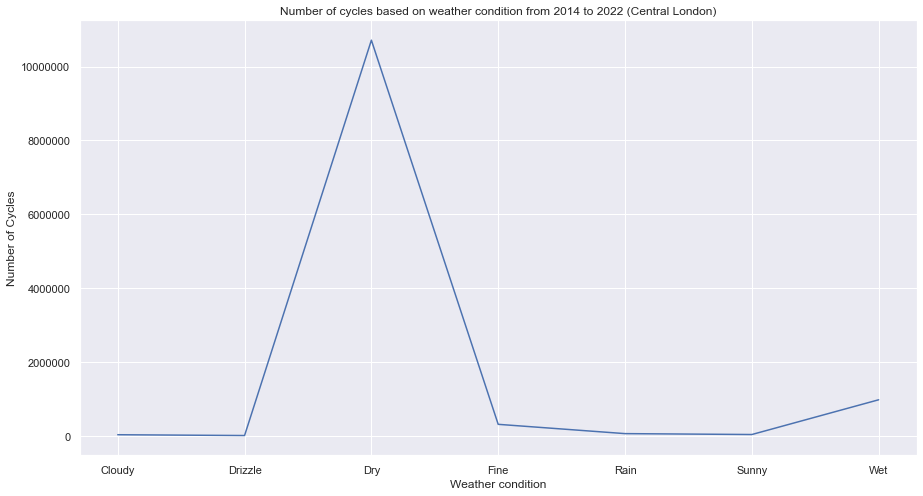

In [381]:
# Visualise relationship between number of cyclists and weather.
central_weather = subset_c_london_updated.groupby(['Weather']).sum().reset_index()

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax = sns.lineplot(data = central_weather, x = 'Weather', y = 'Total cycles')\
.set(title = 'Number of cycles based on weather condition from 2014 to 2022 (Central London)', xlabel = 'Weather condition',
     ylabel = 'Number of Cycles')
plt.ticklabel_format(style='plain', axis='y')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

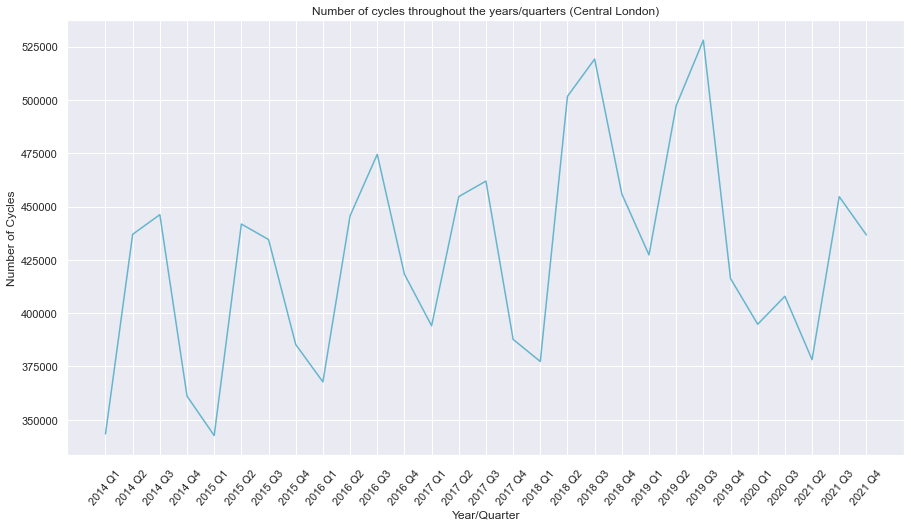

In [264]:
# Visualise relationship between number of cyclists and date (quarters of year).
central_date = subset_c_london.groupby(['Survey Year/Quarter']).sum().reset_index()

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax = sns.lineplot(data = central_date, x = 'Survey Year/Quarter', y = 'Total cycles', color = 'c')\
.set(title = 'Number of cycles throughout the years/quarters (Central London)', xlabel = 'Year/Quarter',
     ylabel = 'Number of Cycles')
plt.xticks(rotation = 50)

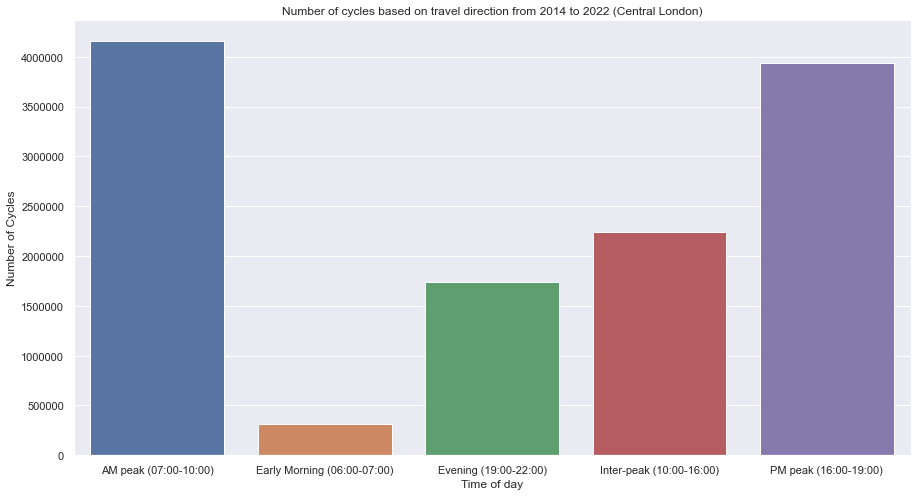

In [294]:
# Visualise relationship between number of cyclists and time of day.
central_tod = subset_c_london.groupby(['Period']).sum().reset_index()

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax = sns.barplot(data = central_tod, x = 'Period', y = 'Total cycles')\
.set(title = 'Number of cycles based on travel direction from 2014 to 2022 (Central London)', xlabel = 'Time of day',
     ylabel = 'Number of Cycles')
plt.ticklabel_format(style='plain', axis='y')

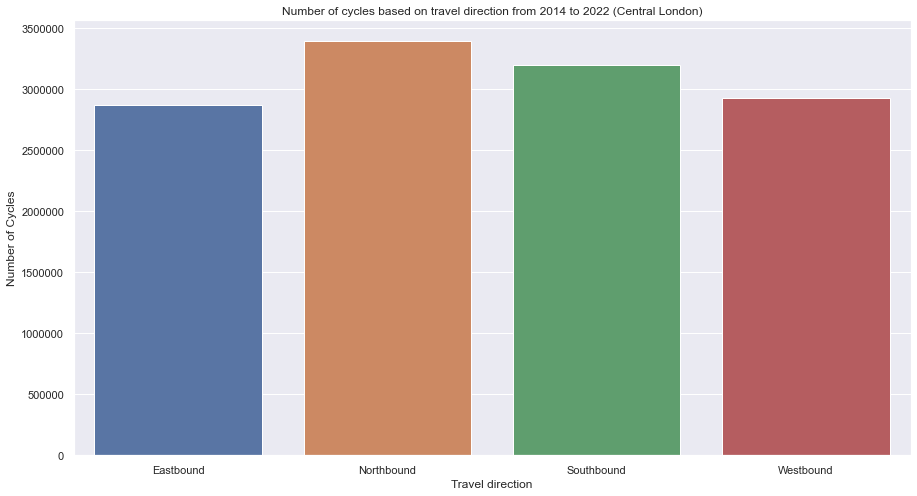

In [293]:
# Visualise relationhip between number of cyclists and direction of travel.
central_dir = subset_c_london.groupby(['Direction']).sum().reset_index()

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax = sns.barplot(data = central_dir, x = 'Direction', y = 'Total cycles')\
.set(title = 'Number of cycles based on travel direction from 2014 to 2022 (Central London)', xlabel = 'Travel direction',
     ylabel = 'Number of Cycles')
plt.ticklabel_format(style='plain', axis='y')

### Inner London data set: visualisations

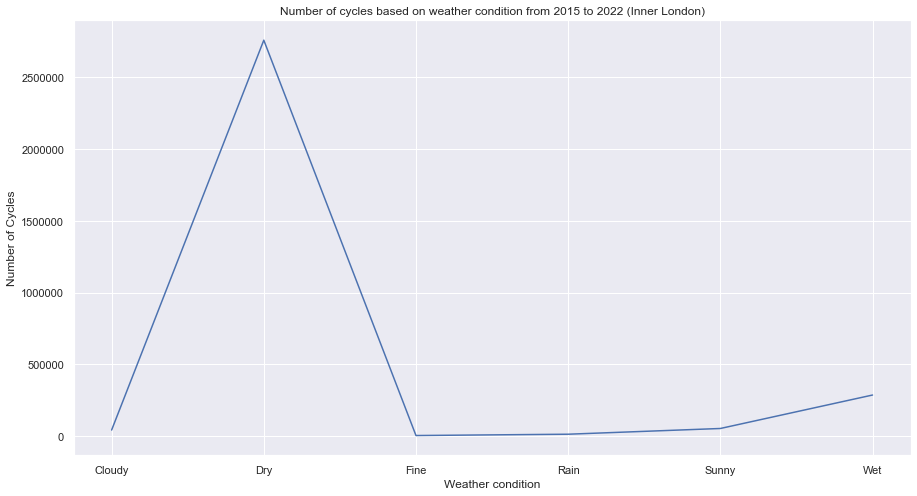

In [379]:
# Visualise relationship between number of cyclists and weather.
inner_weather = subset_i_london_updated.groupby(['Weather']).sum().reset_index()

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax = sns.lineplot(data = inner_weather, x = 'Weather', y = 'Total cycles')\
.set(title = 'Number of cycles based on weather condition from 2015 to 2022 (Inner London)', xlabel = 'Weather condition',
     ylabel = 'Number of Cycles')
plt.ticklabel_format(style='plain', axis='y')

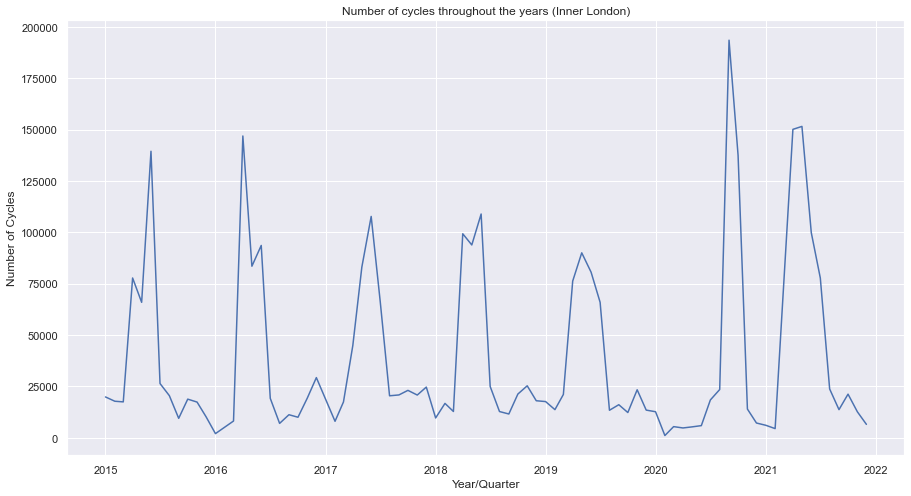

In [263]:
# Visualise relationship between number of cyclists and date.
inner_date = subset_i_london.groupby(['Survey date (Y/M)']).sum().reset_index()

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax = sns.lineplot(data = inner_date, x = 'Survey date (Y/M)', y = 'Total cycles')\
.set(title = 'Number of cycles throughout the years (Inner London)', xlabel = 'Year/Quarter',
     ylabel = 'Number of Cycles')

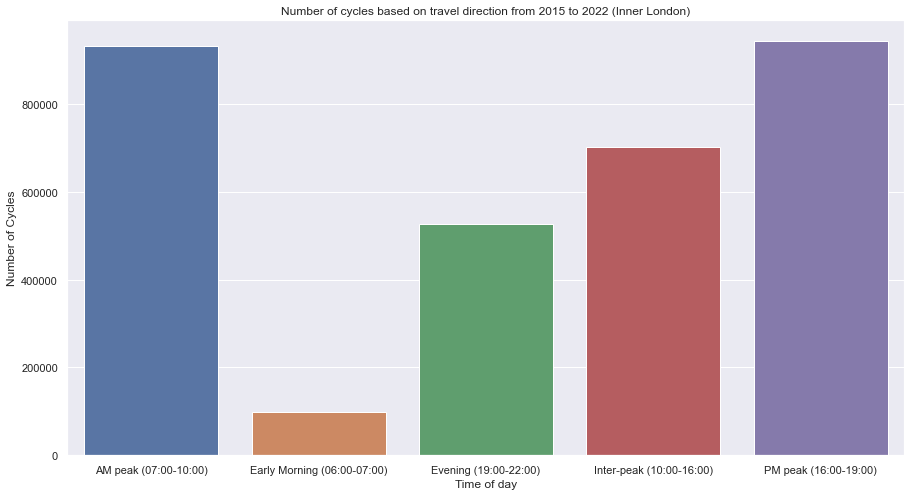

In [292]:
# Visualise relationship between number of cyclists and time of day.
inner_tod = subset_i_london.groupby(['Period']).sum().reset_index()

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax = sns.barplot(data = inner_tod, x = 'Period', y = 'Total cycles')\
.set(title = 'Number of cycles based on travel direction from 2015 to 2022 (Inner London)', xlabel = 'Time of day',
     ylabel = 'Number of Cycles')
plt.ticklabel_format(style='plain', axis='y')

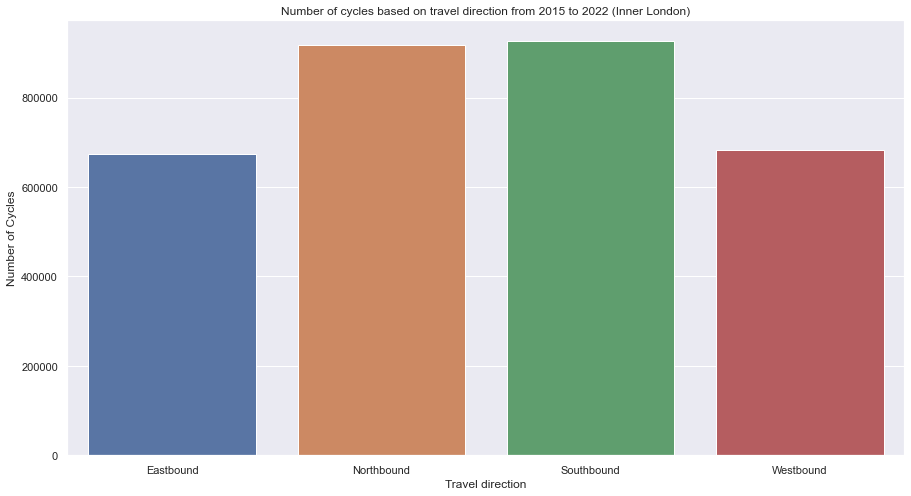

In [291]:
# Visualise relationhip between number of cyclists and direction of travel.
inner_dir = subset_i_london.groupby(['Direction']).sum().reset_index()

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax = sns.barplot(data = inner_dir, x = 'Direction', y = 'Total cycles')\
.set(title = 'Number of cycles based on travel direction from 2015 to 2022 (Inner London)', xlabel = 'Travel direction',
     ylabel = 'Number of Cycles')
plt.ticklabel_format(style='plain', axis='y')

### Outer London data set: visualisations

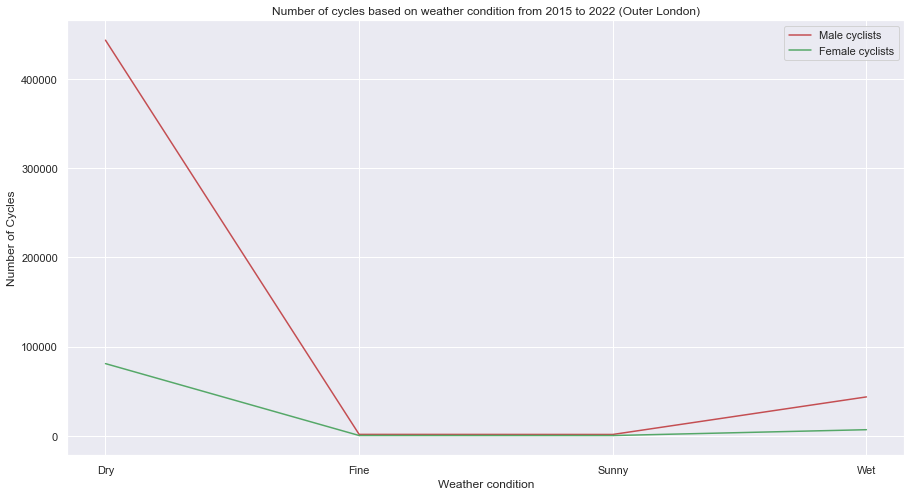

In [375]:
# Visualise relationship between number of cyclists (male vs. female) and weather.
outer_weather = subset_o_london_updated.groupby(['Weather']).sum().reset_index()

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax = sns.lineplot(data = outer_weather, x = 'Weather', y = 'Number of male cycles', color = 'r')
ax1 = sns.lineplot(data = outer_weather, x = 'Weather', y = 'Number of female cycles', color = 'g')\
.set(title = 'Number of cycles based on weather condition from 2015 to 2022 (Outer London)', xlabel = 'Weather condition',
     ylabel = 'Number of Cycles')
plt.legend(labels = ['Male cyclists', 'Female cyclists'])

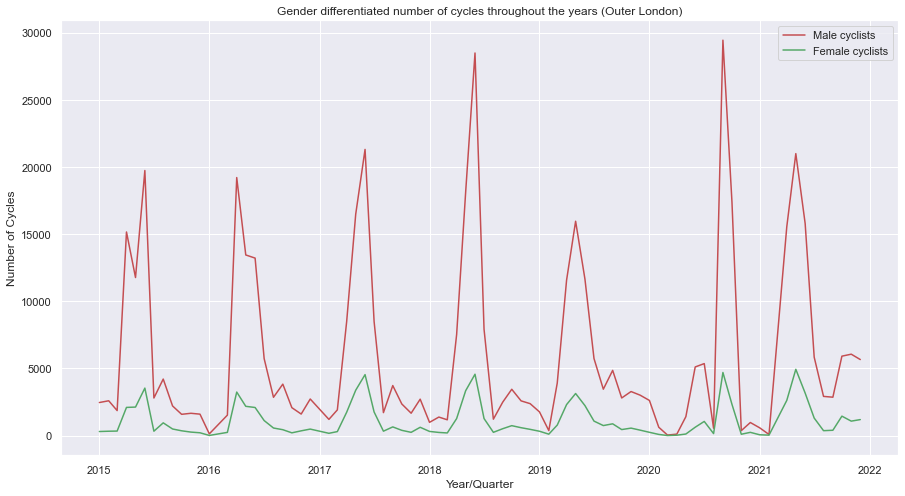

In [261]:
# Visualilse relationhip between number of cyclists (male vs. female) and date.
outer_date = subset_o_london.groupby(['Survey date (Y/M)']).sum().reset_index()

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax = sns.lineplot(data = outer_date, x = 'Survey date (Y/M)', y = 'Number of male cycles', color = 'r')
ax1 = sns.lineplot(data = outer_date, x = 'Survey date (Y/M)', y = 'Number of female cycles', color = 'g')\
.set(title = 'Gender differentiated number of cycles throughout the years (Outer London)', xlabel = 'Year/Quarter',
     ylabel = 'Number of Cycles')
plt.legend(labels = ['Male cyclists', 'Female cyclists'])

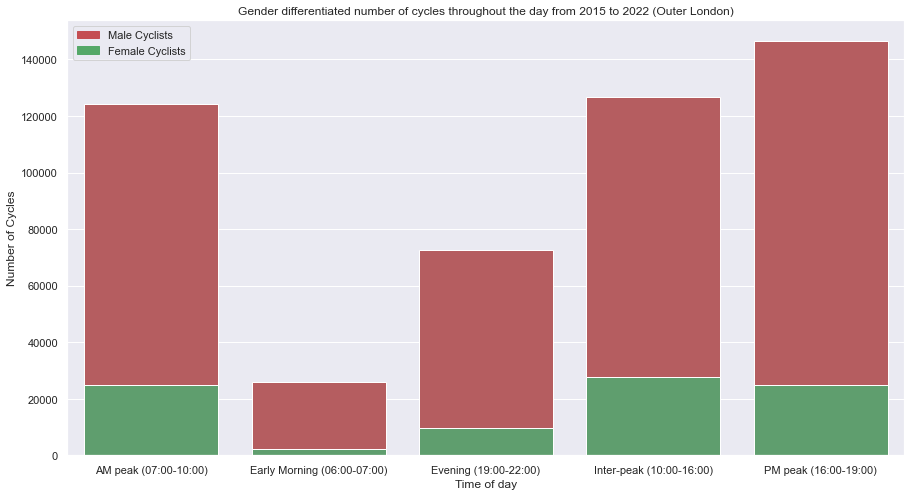

In [289]:
# Visualise relationship between number of cyclists (male vs. female) and time of day.
outer_tod = subset_o_london.groupby(['Period']).sum().reset_index()

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax = sns.barplot(data = outer_tod, x = 'Period', y = 'Number of male cycles', color = 'r')
ax1 = sns.barplot(data = outer_tod, x = 'Period', y = 'Number of female cycles', color = 'g')\
.set(title = 'Gender differentiated number of cycles throughout the day from 2015 to 2022 (Outer London)', 
     xlabel = 'Time of day', ylabel = 'Number of Cycles')
plt.ticklabel_format(style='plain', axis='y')
top_bar = mpatches.Patch(color = 'r', label = 'Male Cyclists')
bottom_bar = mpatches.Patch(color = 'g', label = 'Female Cyclists')
plt.legend(handles = [top_bar, bottom_bar])

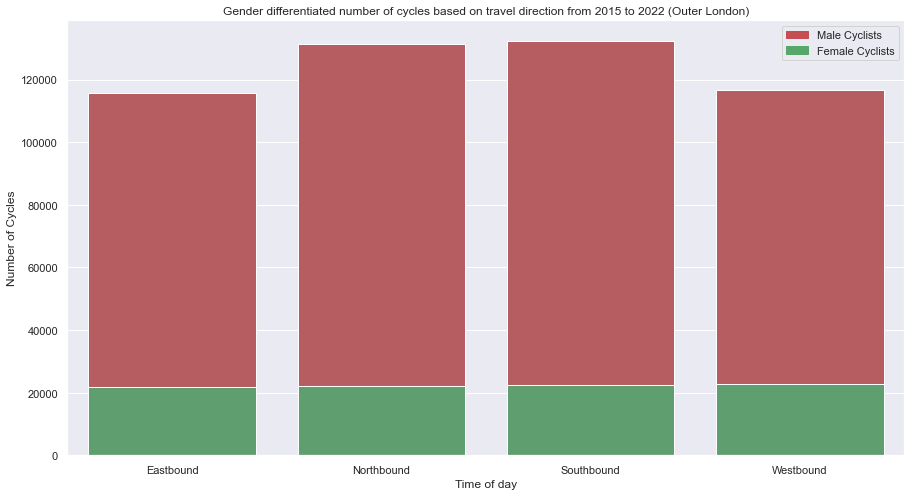

In [290]:
# Visualise relationship between number of cyclists (male vs. female) and direction of travel.
outer_dir = subset_o_london.groupby(['Direction']).sum().reset_index()

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax = sns.barplot(data = outer_dir, x = 'Direction', y = 'Number of male cycles', color = 'r')
ax1 = sns.barplot(data = outer_dir, x = 'Direction', y = 'Number of female cycles', color = 'g')\
.set(title = 'Gender differentiated number of cycles based on travel direction from 2015 to 2022 (Outer London)', 
     xlabel = 'Time of day', ylabel = 'Number of Cycles')
plt.ticklabel_format(style='plain', axis='y')
top_bar = mpatches.Patch(color = 'r', label = 'Male Cyclists')
bottom_bar = mpatches.Patch(color = 'g', label = 'Female Cyclists')
plt.legend(handles = [top_bar, bottom_bar])

## ***Extra***